<a href="https://colab.research.google.com/github/znnz2019/coursera/blob/master/IBM_Capstone_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Coursera Capstone Week 4 - Optimal Business Location Problem
##1. Problem Description:
In this week 4 project, the objective is the find the optimal location for a chinese restaurant in the Madrid city, Spain. Chiese immigrant population has been growing dramatically during the past decade and now become the second largets ethnic group in Madrid city. A new Chinese restaurant based on the local population and country of origin will be a good business opportunity. An analytical approach will be used based on data analysis, machine learning algorithms including clustering and finally some data visualization tools. Data acquisition and transformation will be performed for the further analysis using machine learnign algorithms. The analytical model will provide an optimal location candidates to open a Chinese restaurant. 

##2. Data Description: 
The [Madrid city hall's website](https://www.madrid.es) provides valuable data sources in excel format. The data contains the immigration information such as the country of procedence and nationality. This data will be used to determine the optimal location for opening a new Chinese restaurants. 
Foursquare API will be accessed through Python to obtain the most common venues per neighborhood in Madrid, such as the distribution of venues, common places for locals, and also popular spots. 

##3. Data Acquisition and Transformation:



In [0]:
import numpy as np
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize

In [0]:
#uploade the data from local drive
from google.colab import files
uploaded = files.upload()
print('File uploaded')

Saving madrid.xls to madrid (2).xls
File uploaded


In [0]:
df = pd.read_excel('madrid.xls', sheet_name = 'sheet1', skiprows=12)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,Rumanía,45036.0,815.0,754.0,480.0,753.0,680.0,1468.0,597.0,1830.0,991.0,4904.0,5873.0,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0
1,NaN,China,37276.0,1508.0,1356.0,564.0,755.0,652.0,1988.0,816.0,1733.0,960.0,2554.0,4398.0,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0
2,NaN,Ecuador,23953.0,647.0,741.0,265.0,619.0,380.0,1395.0,453.0,632.0,387.0,2194.0,3674.0,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0
3,NaN,Venezuela,23359.0,1563.0,913.0,638.0,1564.0,933.0,1310.0,794.0,1428.0,630.0,1448.0,1870.0,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0
4,NaN,Colombia,22618.0,998.0,717.0,483.0,803.0,551.0,822.0,659.0,999.0,454.0,1786.0,3395.0,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 24 columns):
Unnamed: 0     0 non-null float64
Unnamed: 1     36 non-null object
Unnamed: 2     34 non-null float64
Unnamed: 3     34 non-null float64
Unnamed: 4     34 non-null float64
Unnamed: 5     34 non-null float64
Unnamed: 6     34 non-null float64
Unnamed: 7     34 non-null float64
Unnamed: 8     34 non-null float64
Unnamed: 9     34 non-null float64
Unnamed: 10    34 non-null float64
Unnamed: 11    34 non-null float64
Unnamed: 12    34 non-null float64
Unnamed: 13    34 non-null float64
Unnamed: 14    34 non-null float64
Unnamed: 15    34 non-null float64
Unnamed: 16    34 non-null float64
Unnamed: 17    34 non-null float64
Unnamed: 18    34 non-null float64
Unnamed: 19    34 non-null float64
Unnamed: 20    34 non-null float64
Unnamed: 21    34 non-null float64
Unnamed: 22    34 non-null float64
Unnamed: 23    34 non-null float64
dtypes: float64(23), object(1)
memory usage: 7.2+ KB


In [0]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.columns = ['Country of Origin', 'Total', 'Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartin',
                'Tetuán', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Latina', 'Carabanchel',
                'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
                'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas', 'Barajas']
df.head(10)

,Country of Origin,Total,Centro,Arganzuela,Retiro,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas
0,Rumanía,45036.0,815.0,754.0,480.0,753.0,680.0,1468.0,597.0,1830.0,991.0,4904.0,5873.0,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0
1,China,37276.0,1508.0,1356.0,564.0,755.0,652.0,1988.0,816.0,1733.0,960.0,2554.0,4398.0,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0
2,Ecuador,23953.0,647.0,741.0,265.0,619.0,380.0,1395.0,453.0,632.0,387.0,2194.0,3674.0,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0
3,Venezuela,23359.0,1563.0,913.0,638.0,1564.0,933.0,1310.0,794.0,1428.0,630.0,1448.0,1870.0,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0
4,Colombia,22618.0,998.0,717.0,483.0,803.0,551.0,822.0,659.0,999.0,454.0,1786.0,3395.0,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0
5,Marruecos,21909.0,1101.0,390.0,184.0,322.0,280.0,1393.0,320.0,930.0,342.0,1539.0,2223.0,942.0,3437.0,258.0,1011.0,426.0,3372.0,1655.0,802.0,649.0,333.0
6,Italia,20308.0,3030.0,1219.0,840.0,1817.0,1060.0,1194.0,1640.0,1195.0,710.0,826.0,915.0,412.0,704.0,310.0,1258.0,1109.0,330.0,427.0,189.0,786.0,337.0
7,Perú,18829.0,563.0,521.0,253.0,612.0,419.0,965.0,567.0,805.0,368.0,2026.0,2425.0,1131.0,2079.0,668.0,1726.0,603.0,1280.0,564.0,338.0,810.0,106.0
8,Paraguay,18682.0,364.0,474.0,237.0,521.0,657.0,3311.0,584.0,1024.0,636.0,2061.0,2152.0,727.0,1354.0,360.0,1619.0,583.0,870.0,217.0,199.0,581.0,151.0
9,República Dominicana,17511.0,365.0,654.0,204.0,344.0,322.0,2272.0,443.0,589.0,536.0,1501.0,1607.0,1202.0,1989.0,223.0,1581.0,359.0,1881.0,296.0,151.0,889.0,103.0


In [0]:
df.dtypes

Country of Origin       object
Total                  float64
Centro                 float64
Arganzuela             float64
Retiro                 float64
Salamanca              float64
Chamartin              float64
Tetuán                 float64
Chamberí               float64
Fuencarral-El Pardo    float64
Moncloa-Aravaca        float64
Latina                 float64
Carabanchel            float64
Usera                  float64
Puente de Vallecas     float64
Moratalaz              float64
Ciudad Lineal          float64
Hortaleza              float64
Villaverde             float64
Villa de Vallecas      float64
Vicálvaro              float64
San Blas-Canillejas    float64
Barajas                float64
dtype: object

### apply location coordinates (latitude and longitude) of madrid neighborhoods or districits

In [0]:
dfcol = ['Madrid, Madrid','Centro, Madrid', 'Arganzuela, Madrid', 'Retiro, Madrid', 'Salamanca, Madrid', 'Chamartin, Madrid',
                'Tetuán, Madrid', 'Chamberí, Madrid', 'Fuencarral-El Pardo, Madrid', 'Moncloa-Aravaca, Madrid', 'Latina, Madrid', 'Carabanchel, Madrid',
                'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
                'Villa de Vallecas, Madrid', 'Vicálvaro, Madrid', 'San Blas-Canillejas, Madrid', 'Barajas, Madrid']


dflat = []
dflon = []

i = 0
for x in dfcol:
  address = dfcol[i]
  geolocator = Nominatim()
  location = geolocator.geocode(address)
  dflat.append(location.latitude)
  dflon.append(location.longitude)
  print(address)
  print('The geograpical coordinates are {}, {}.'.format(dflat[i], dflon[i]))
  i = i+1
  


/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


Madrid, Madrid
The geograpical coordinates are 40.4167047, -3.7035825.
Centro, Madrid
The geograpical coordinates are 40.41755205, -3.70794112547603.
Arganzuela, Madrid
The geograpical coordinates are 40.39803445, -3.69381878647137.
Retiro, Madrid
The geograpical coordinates are 40.4081555, -3.67744132809895.
Salamanca, Madrid
The geograpical coordinates are 40.43152685, -3.6747257985731.
Chamartin, Madrid
The geograpical coordinates are 40.4607638, -3.67753405826461.
Tetuán, Madrid
The geograpical coordinates are 40.4607024, -3.69955020150567.
Chamberí, Madrid
The geograpical coordinates are 40.43624735, -3.70383035345138.
Fuencarral-El Pardo, Madrid
The geograpical coordinates are 40.55634555, -3.77859051375181.
Moncloa-Aravaca, Madrid
The geograpical coordinates are 40.43949485, -3.74420353965471.
Latina, Madrid
The geograpical coordinates are 40.3880677, -3.78660605583717.
Carabanchel, Madrid
The geograpical coordinates are 40.3811929, -3.73797568773365.
Usera
The geograpical coord

In [0]:
dflat

[40.4167047,
 40.41755205,
 40.39803445,
 40.4081555,
 40.43152685,
 40.4607638,
 40.4607024,
 40.43624735,
 40.55634555,
 40.43949485,
 40.3880677,
 40.3811929,
 40.3776019,
 40.3868601,
 40.4055207,
 40.44862135,
 40.4808253,
 40.34309205,
 40.35127525,
 40.3882402,
 40.4304643,
 40.47984005]

In [0]:
 df_cd = pd.DataFrame( data = {

'Neighborhood' : dfcol,
'Longitude' : dflat,
'Latitude': dflon})
df_cd

,Neighborhood,Longitude,Latitude
0,"Madrid, Madrid",40.416705,-3.703582
1,"Centro, Madrid",40.417552,-3.707941
2,"Arganzuela, Madrid",40.398034,-3.693819
3,"Retiro, Madrid",40.408155,-3.677441
4,"Salamanca, Madrid",40.431527,-3.674726
5,"Chamartin, Madrid",40.460764,-3.677534
6,"Tetuán, Madrid",40.460702,-3.699550
7,"Chamberí, Madrid",40.436247,-3.703830
8,"Fuencarral-El Pardo, Madrid",40.556346,-3.778591
9,"Moncloa-Aravaca, Madrid",40.439495,-3.744204


In [0]:
df_cd.dtypes

Neighborhood     object
Longitude       float64
Latitude        float64
dtype: object

###Create a mpt of Madrid with neighborhoods

In [0]:
Madrid_map = folium.Map(location=[40.416705, -3.703582], zoom_start=11)
for point in range (0, len(dfcol)):
  folium.Marker([dflat[point],dflon[point]]).add_to(Madrid_map)
Madrid_map

In [0]:
#Foursquare credentials: 
CLIENT_ID = 'PRVRVWIYC5CATOZ0EAXCZVLB3BESVQMMAD1DLUUSAKP5B43M'
CLIENT_SECRET = 'BCVHG2N3WKHL4AXDPYRPC0FFI0AVKWAWKJR5FCSKROI2N2N4'
VERSION = '20180605' # Foursquare API version


In [0]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    df_cd.loc[0, 'Longitude'], 
    df_cd.loc[0, 'Latitude'], 
    1000, 
    100)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d5e08862b274a002c0f3d9b'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-5478dde0498eab68d4d6423f-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tapas_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1db931735',
         'name': 'Tapas Restaurant',
         'pluralName': 'Tapas Restaurants',
         'primary': True,
         'shortName': 'Tapas'}],
       'id': '5478dde0498eab68d4d6423f',
       'location': {'address': 'Calle Cadiz 4',
        'cc': 'ES',
        'city': 'Madrid',
        'country': 'España',
        'distance': 111,
        'formattedAddress': ['Calle Cadiz 4', '28012 Madrid Madrid', 'España'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.415821011717526,
          'lng'

In [0]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [0]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

,name,categories,lat,lng
0,Rosi La Loca,Tapas Restaurant,40.415821,-3.702955
1,Puerta del Sol,Plaza,40.417027,-3.703443
2,Club del Gourmet Corte Ingles,Gourmet Shop,40.417497,-3.704686
3,Bacoa,Burger Joint,40.416698,-3.701682
4,Apple Puerta del Sol,Electronics Store,40.416804,-3.702221
5,TOC Hostel,Hostel,40.417264,-3.705928
6,La Pulpería de Victoria,Seafood Restaurant,40.416506,-3.701709
7,Ferpal,Restaurant,40.417046,-3.705742
8,InClan Brutal Bar,Tapas Restaurant,40.415023,-3.701864
9,SunGate Hostel,Hostel,40.418696,-3.704623


In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
Madrid_venues = getNearbyVenues(names= df_cd['Neighborhood'],
                                   latitudes= df_cd['Latitude'],
                                   longitudes= df_cd['Longitude']
                                  )

Madrid, Madrid


NameError: ignored

In [0]:
Madrid_venues

NameError: ignored

In [0]:
Madrid_venues.groupby('Neighborhood').count()

NameError: ignored

In [0]:
madrid_onehot = pd.get_dummies(Madrid_venues[['Venue Category']], prefix="", prefix_sep="")
madrid_onehot['Neighborhood'] = Madrid_venues['Neighborhood'] 
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]
madrid_onehot

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Camera Store,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,...,Plaza,Polish Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Road,Salad Place,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trade School,Train,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
madrid_grouped = madrid_onehot.groupby('Neighborhood').mean().reset_index()
madrid_grouped

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Camera Store,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,...,Plaza,Polish Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Road,Salad Place,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trade School,Train,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Arganzuela,0.000,0.022472,0.000000,0.000000,0.00,0.011236,0.000000,0.000000,0.044944,0.011236,0.011236,0.022472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.022472,0.011236,0.0,0.022472,0.000000,0.000000,0.000000,0.011236,0.000,0.000,0.011236,0.000000,0.000000,0.011236,0.00,0.011236,0.000,0.00,0.011236,0.000000,...,0.022472,0.000000,0.000000,0.000000,0.00,0.089888,0.00,0.000000,0.011236,0.022472,0.000000,0.011236,0.000000,0.00,0.000000,0.00,0.022472,0.000000,0.000000,0.00,0.112360,0.000000,0.000000,0.000000,0.000000,0.044944,0.011236,0.00,0.011236,0.00,0.011236,0.000,0.011236,0.000000,0.011236,0.011236,0.000000,0.000000,0.000000,0.000000
1,Barajas,0.000,0.000000,0.032258,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.032258,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.064516,0.00,0.000000,0.000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.129032,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.096774,0.000000,0.000000,0.064516,0.000000,0.064516,0.000000,0.00,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000
2,Carabanchel,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.00,0.000000,0.000000,...,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.142857,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Centro,0.010,0.010000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.020000,0.010000,0.000000,0.040000,0.000000,0.010000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.010000,0.000000,0.000000,0.010,0.020,0.000000,0.000000,0.000000,0.020000,0.01,0.000000,0.000,0.01,0.000000,0.000000,...,0.060000,0.000000,0.010000,0.020000,0.01,0.050000,0.01,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.01,0.000000,0.01,0.000000,0.000000,0.000000,0.01,0.110000,0.000000,0.000000,0.010000,0.000000,0.070000,0.000000,0.01,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
4,Chamartin,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.019231,0.057692,0.019231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.038462,0.000000,0.000000,0.000,0.000,0.000000,0.000

In [0]:
num_top_venues = 5

for hood in madrid_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = madrid_grouped[madrid_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arganzuela----
                venue  freq
0  Spanish Restaurant  0.11
1          Restaurant  0.09
2       Grocery Store  0.06
3              Bakery  0.04
4    Tapas Restaurant  0.04


----Barajas----
                venue  freq
0               Hotel  0.23
1          Restaurant  0.13
2  Spanish Restaurant  0.10
3         Coffee Shop  0.06
4    Tapas Restaurant  0.06


----Carabanchel----
          venue  freq
0         Plaza  0.14
1   Pizza Place  0.14
2  Soccer Field  0.14
3     Nightclub  0.14
4        Bakery  0.14


----Centro----
                venue  freq
0  Spanish Restaurant  0.11
1    Tapas Restaurant  0.07
2               Plaza  0.06
3          Restaurant  0.05
4              Bistro  0.04


----Chamartin----
                venue  freq
0  Spanish Restaurant  0.21
1          Restaurant  0.13
2         Pizza Place  0.06
3       Grocery Store  0.06
4              Bakery  0.06


----Chamberí----
                 venue  freq
0   Spanish Restaurant  0.13
1           Restaurant 

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [0]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = madrid_grouped['Neighborhood']

for ind in np.arange(madrid_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arganzuela,Spanish Restaurant,Restaurant,Grocery Store,Bakery,Tapas Restaurant,Gym / Fitness Center,Breakfast Spot,Plaza,Sandwich Place,Hotel
1,Barajas,Hotel,Restaurant,Spanish Restaurant,Coffee Shop,Tapas Restaurant,Supermarket,Mexican Restaurant,Brewery,Fast Food Restaurant,Japanese Restaurant
2,Carabanchel,Pizza Place,Nightclub,Burger Joint,Plaza,Fast Food Restaurant,Bakery,Soccer Field,Flea Market,Fish Market,Farmers Market
3,Centro,Spanish Restaurant,Tapas Restaurant,Plaza,Restaurant,Mexican Restaurant,Bistro,Hostel,Ice Cream Shop,Hotel,Ramen Restaurant
4,Chamartin,Spanish Restaurant,Restaurant,Pizza Place,Grocery Store,Bakery,Tapas Restaurant,Gastropub,Japanese Restaurant,Café,Park
5,Chamberí,Spanish Restaurant,Brewery,Bar,Restaurant,Café,Japanese Restaurant,Tapas Restaurant,Mexican Restaurant,Italian Restaurant,Plaza
6,Ciudad Lineal,Spanish Restaurant,Burger Joint,Argentinian Restaurant,Restaurant,Supermarket,Gastropub,Shopping Mall,Music Venue,German Restaurant,Tapas Restaurant
7,Fuencarral-El Pardo,Italian Restaurant,Clothing Store,Fast Food Restaurant,Burger Joint,Restaurant,Tapas Restaurant,Bar,Park,Sandwich Place,Chocolate Shop
8,Hortaleza,Pizza Place,Spanish Restaurant,Breakfast Spot,Restaurant,Clothing Store,Chinese Restaurant,Plaza,Donut Shop,Big Box Store,Pharmacy
9,Latina,Pizza Place,Grocery Store,Shopping Mall,Fast Food Restaurant,Falafel Restaurant,Food & Drink Shop,Bakery,Metro Station,Asian Restaurant,Train Station


In [0]:
madrid_grouped_clustering = madrid_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1, 22)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(madrid_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

In [0]:
optimal_k= pd.DataFrame(data= Sum_of_squared_distances, columns = ['Sum_of_squared_distances'], index = K)
optimal_k.rename_axis('K', axis = 'columns', inplace = True)
#optimal_k

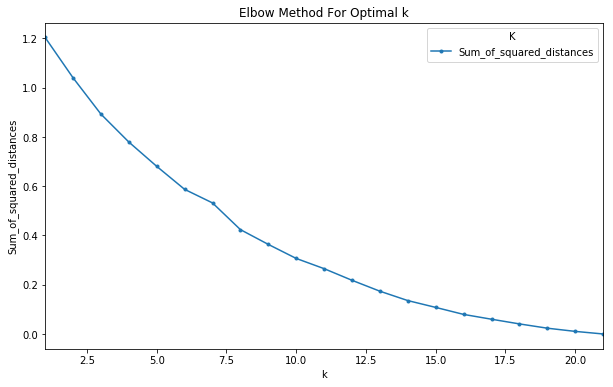

In [0]:
optimal_k.plot(kind = 'line', figsize = (10, 6), marker = '.')
plt.xlabel('k')
plt.ylabel('Sum of Square Distance')
plt.title('K Value')
plt.show()

In [0]:
kclusters = 5
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)
kmeans.labels_[0:10]

array([0, 0, 4, 0, 0, 0, 0, 0, 1, 2], dtype=int32)

In [0]:
df['Neighborhood'] = neighborhoods_venues_sorted['Neighborhood']
print(df.shape)
df.isnull().sum()
df.dropna(how = 'any', axis = 0, inplace = True)
print(df.shape)
print(neighborhoods_venues_sorted.shape)

(38, 24)
(21, 24)
(21, 11)


In [0]:
madrid_merged = df
madrid_merged['Cluster Labels'] = kmeans.labels_
madrid_merged = madrid_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
madrid_merged[['Latitude', 'Longitude']] = coordinates_df[['Latitude', 'Longitude']]
madrid_merged['Latitude'] = madrid_merged['Latitude'].astype(float)
madrid_merged['Longitude'] = madrid_merged['Longitude'].astype(float)
print(madrid_merged.shape)
madrid_merged

(21, 37)


,Country of Origin,Total,Centro,Arganzuela,Retiro,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,Rumanía,45036.0,815.0,754.0,480.0,753.0,680.0,1468.0,597.0,1830.0,991.0,4904.0,5873.0,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0,Arganzuela,0,Spanish Restaurant,Restaurant,Grocery Store,Bakery,Tapas Restaurant,Gym / Fitness Center,Breakfast Spot,Plaza,Sandwich Place,Hotel,40.415347,-3.707371
1,China,37276.0,1508.0,1356.0,564.0,755.0,652.0,1988.0,816.0,1733.0,960.0,2554.0,4398.0,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0,Barajas,0,Hotel,Restaurant,Spanish Restaurant,Coffee Shop,Tapas Restaurant,Supermarket,Mexican Restaurant,Brewery,Fast Food Restaurant,Japanese Restaurant,40.402733,-3.695403
2,Ecuador,23953.0,647.0,741.0,265.0,619.0,380.0,1395.0,453.0,632.0,387.0,2194.0,3674.0,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0,Carabanchel,4,Pizza Place,Nightclub,Burger Joint,Plaza,Fast Food Restaurant,Bakery,Soccer Field,Flea Market,Fish Market,Farmers Market,40.408072,-3.676729
3,Venezuela,23359.0,1563.0,913.0,638.0,1564.0,933.0,1310.0,794.0,1428.0,630.0,1448.0,1870.0,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0,Centro,0,Spanish Restaurant,Tapas Restaurant,Plaza,Restaurant,Mexican Restaurant,Bistro,Hostel,Ice Cream Shop,Hotel,Ramen Restaurant,40.430000,-3.677778
4,Colombia,22618.0,998.0,717.0,483.0,803.0,551.0,822.0,659.0,999.0,454.0,1786.0,3395.0,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0,Chamartin,0,Spanish Restaurant,Restaurant,Pizza Place,Grocery Store,Bakery,Tapas Restaurant,Gastropub,Japanese Restaurant,Café,Park,40.453333,-3.677500
5,Marruecos,21909.0,1101.0,390.0,184.0,322.0,280.0,1393.0,320.0,930.0,342.0,1539.0,2223.0,942.0,3437.0,258.0,1011.0,426.0,3372.0,1655.0,802.0,649.0,333.0,Chamberí,0,Spanish Restaurant,Brewery,Bar,Restaurant,Café,Japanese Restaurant,Tapas Restaurant,Mexican Restaurant,Italian Restaurant,Plaza,40.460556,-3.700000
6,Italia,20308.0,3030.0,1219.0,840.0,1817.0,1060.0,1194.0,1640.0,1195.0,710.0,826.0,915.0,412.0,704.0,310.0,1258.0,1109.0,330.0,427.0,189.0,786.0,337.0,Ciudad Lineal,0,Spanish Restaurant,Burger Joint,Argentinian Restaurant,Restaurant,Supermarket,Gastropub,Shopping Mall,Music Venue,German Restaurant,Tapas Restaurant,40.432792,-3.697186
7,Perú,18829.0,563.0,521.0,253.0,612.0,419.0,965.0,567.0,805.0,368.0,2026.0,2425.0,1131.0,2079.0,668.0,1726.0,603.0,1280.0,564.0,338.0,810.0,106.0,Fuencarral-El Pardo,0,Italian Restaurant,Clothing Store,Fast Food Restaurant,Burger Joint,Restaurant,Tapas Restaurant,Bar,Park,Sandwich Place,Chocolate Shop,40.478611,-3.709722
8,Paraguay,18682.0,364.0,474.0,237.0,521.0,657.0,3311.0,584.0,1024.0,636.0,2061.0,2152.0,727.0,1354.0,360.0,1619.0,583.0,870.0,217.0,199.0,581.0,151.0,Hortaleza,1,Pizza Place,Spanish Restaurant,Breakfast Spot,Restaurant,Clothing Store,Chinese Restaurant,Plaza,Donut Shop,Big Box Store,Pharmacy,40.435151,-3.718765
9,República Dominicana,17511.0,365.0,654.0,204.0,344.0,322.0,2272.0,443.0,589.0,536.0,1501.0,1607.0,1202.0,1989.0,223.0,1581.0,359.0,1881.0,296.0,151.0,889.0,103.0,Latina,2,Pizza Place,Grocery Store,Shopping Mall,Fast Food Restaurant,Falafel Restaurant,Food & Drink Shop,Bakery,Metro Station,Asian Restaurant,Train Station,40.402461,-3.741294


In [0]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Neighborhood'], madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.3).add_to(map_clusters)
       
map_clusters

In [0]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 0, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Origin'], ascending = False)

,Country of Origin,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
3,Venezuela,1564.0,933.0,1310.0,794.0,1428.0,630.0,1448.0,1870.0,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0,Centro,0,Spanish Restaurant,Tapas Restaurant,Plaza,Restaurant,Mexican Restaurant,Bistro,Hostel,Ice Cream Shop,Hotel,Ramen Restaurant,40.430000,-3.677778
0,Rumanía,753.0,680.0,1468.0,597.0,1830.0,991.0,4904.0,5873.0,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0,Arganzuela,0,Spanish Restaurant,Restaurant,Grocery Store,Bakery,Tapas Restaurant,Gym / Fitness Center,Breakfast Spot,Plaza,Sandwich Place,Hotel,40.415347,-3.707371
19,Reino Unido,550.0,466.0,329.0,501.0,313.0,304.0,211.0,170.0,81.0,142.0,59.0,285.0,319.0,61.0,49.0,27.0,120.0,74.0,Villa de Vallecas,0,Soccer Field,Park,Train Station,Plaza,Grocery Store,Spanish Restaurant,Sandwich Place,Church,Eastern European Restaurant,Fast Food Restaurant,40.426001,-3.612764
13,Portugal,695.0,534.0,590.0,509.0,693.0,365.0,533.0,658.0,283.0,597.0,173.0,612.0,727.0,302.0,262.0,168.0,565.0,191.0,Retiro,0,Spanish Restaurant,Museum,Supermarket,Tapas Restaurant,Bar,Grocery Store,Pizza Place,Polish Restaurant,Mexican Restaurant,Farmers Market,40.409869,-3.644436
7,Perú,612.0,419.0,965.0,567.0,805.0,368.0,2026.0,2425.0,1131.0,2079.0,668.0,1726.0,603.0,1280.0,564.0,338.0,810.0,106.0,Fuencarral-El Pardo,0,Italian Restaurant,Clothing Store,Fast Food Restaurant,Burger Joint,Restaurant,Tapas Restaurant,Bar,Park,Sandwich Place,Chocolate Shop,40.478611,-3.709722
5,Marruecos,322.0,280.0,1393.0,320.0,930.0,342.0,1539.0,2223.0,942.0,3437.0,258.0,1011.0,426.0,3372.0,1655.0,802.0,649.0,333.0,Chamberí,0,Spanish Restaurant,Brewery,Bar,Restaurant,Café,Japanese Restaurant,Tapas Restaurant,Mexican Restaurant,Italian Restaurant,Plaza,40.460556,-3.700000
6,Italia,1817.0,1060.0,1194.0,1640.0,1195.0,710.0,826.0,915.0,412.0,704.0,310.0,1258.0,1109.0,330.0,427.0,189.0,786.0,337.0,Ciudad Lineal,0,Spanish Restaurant,Burger Joint,Argentinian Restaurant,Restaurant,Supermarket,Gastropub,Shopping Mall,Music Venue,German Restaurant,Tapas Restaurant,40.432792,-3.697186
10,Honduras,332.0,337.0,755.0,317.0,863.0,335.0,2021.0,2870.0,1115.0,2483.0,281.0,1062.0,349.0,1040.0,387.0,165.0,598.0,62.0,Moncloa-Aravaca,0,Tapas Restaurant,Restaurant,Bar,Japanese Restaurant,Bakery,Pizza Place,Ice Cream Shop,Spanish Restaurant,Pub,Italian Restaurant,40.383669,-3.727989
14,Francia,968.0,554.0,387.0,699.0,366.0,347.0,196.0,188.0,66.0,138.0,85.0,599.0,1802.0,68.0,59.0,52.0,357.0,197.0,Salamanca,0,Spanish Restaurant,Seafood Restaurant,Coffee Shop,Restaurant,Clothing Store,Gym,Mexican Restaurant,Burger Joint,Steakhouse,Tapas Restaurant,40.450000,-3.650000
12,Filipinas,578.0,661.0,4473.0,771.0,442.0,568.0,629.0,400.0,225.0,418.0,76.0,590.0,300.0,140.0,25.0,24.0,152.0,30.0,Puente de Vallecas,0,Fast Food Restaurant,Gym,Grocery Store,Hotel,Bar,Tapas Restaurant,Supermarket,Spanish Restaurant,Camera Store,Café,40.398204,-3.669059


In [0]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 1, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Origin'], ascending = False)

,Country of Origin,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
8,Paraguay,521.0,657.0,3311.0,584.0,1024.0,636.0,2061.0,2152.0,727.0,1354.0,360.0,1619.0,583.0,870.0,217.0,199.0,581.0,151.0,Hortaleza,1,Pizza Place,Spanish Restaurant,Breakfast Spot,Restaurant,Clothing Store,Chinese Restaurant,Plaza,Donut Shop,Big Box Store,Pharmacy,40.435151,-3.718765
18,Estados Unidos de América,749.0,389.0,300.0,657.0,297.0,428.0,207.0,125.0,86.0,139.0,232.0,252.0,206.0,54.0,51.0,33.0,101.0,57.0,Vicálvaro,1,Pizza Place,Spanish Restaurant,Grocery Store,Fast Food Restaurant,Sandwich Place,Café,Breakfast Spot,Beer Bar,Brewery,Ice Cream Shop,40.404200,-3.608060
20,Bangladesh,32.0,21.0,210.0,48.0,27.0,14.0,257.0,410.0,175.0,649.0,23.0,179.0,27.0,489.0,57.0,32.0,78.0,2.0,Villaverde,1,Spanish Restaurant,Pizza Place,Plaza,Train,Diner,Electronics Store,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,40.470196,-3.584890


In [0]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 2, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Origin'], ascending = False)


,Country of Origin,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
15,Ucrania,220.0,176.0,221.0,149.0,312.0,168.0,1745.0,1251.0,428.0,912.0,239.0,348.0,282.0,1649.0,256.0,152.0,390.0,56.0,San Blas-Canillejas,2,Metro Station,Pizza Place,Gym,Supermarket,Shopping Mall,Grocery Store,Snack Place,Asian Restaurant,Dessert Shop,Department Store,40.469457,-3.640482
9,República Dominicana,344.0,322.0,2272.0,443.0,589.0,536.0,1501.0,1607.0,1202.0,1989.0,223.0,1581.0,359.0,1881.0,296.0,151.0,889.0,103.0,Latina,2,Pizza Place,Grocery Store,Shopping Mall,Fast Food Restaurant,Falafel Restaurant,Food & Drink Shop,Bakery,Metro Station,Asian Restaurant,Train Station,40.402461,-3.741294


In [0]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 3, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Origin'], ascending = False)

,Country of Origin,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
17,Bulgaria,113.0,123.0,245.0,74.0,316.0,170.0,996.0,988.0,395.0,760.0,285.0,780.0,283.0,516.0,261.0,269.0,662.0,92.0,Usera,3,Chinese Restaurant,Noodle House,Seafood Restaurant,Spanish Restaurant,Asian Restaurant,Fast Food Restaurant,Grocery Store,Theater,Bubble Tea Shop,Fabric Shop,40.3796,-3.62135


In [0]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 4, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Origin'], ascending = False)


,Country of Origin,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
2,Ecuador,619.0,380.0,1395.0,453.0,632.0,387.0,2194.0,3674.0,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0,Carabanchel,4,Pizza Place,Nightclub,Burger Joint,Plaza,Fast Food Restaurant,Bakery,Soccer Field,Flea Market,Fish Market,Farmers Market,40.408072,-3.676729
